In [1]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
pi=np.pi
def myQFT(n):
    myQFT_circuit=QuantumCircuit(n)
    for qubit in range(n):
        myQFT_circuit.h(qubit)
        for otherqubit in range(qubit+1,n):
            myQFT_circuit.cp(pi/(2**(otherqubit-qubit)),otherqubit,qubit)
    return myQFT_circuit
display(myQFT(3).draw())

┌───┐                                     
q_0: ┤ H ├─■────────■──────────────────────────
     └───┘ │P(π/2)  │       ┌───┐              
q_1: ──────■────────┼───────┤ H ├─■────────────
                    │P(π/4) └───┘ │P(π/2) ┌───┐
q_2: ───────────────■─────────────■───────┤ H ├
                                          └───┘

computational basis


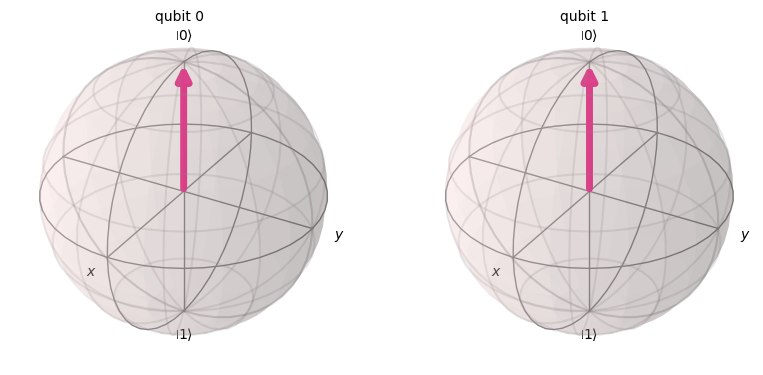

fourier basis


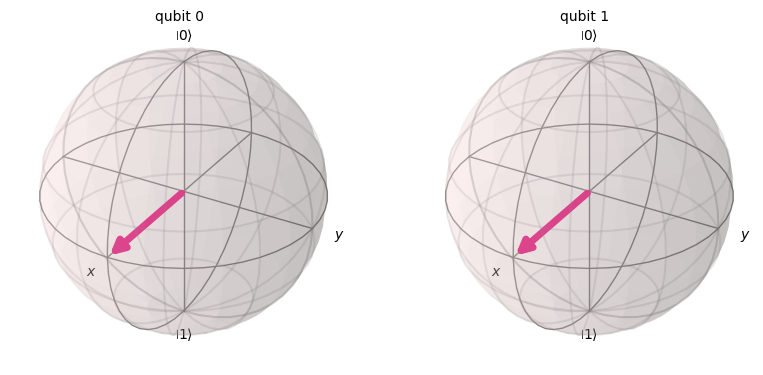

In [4]:
state='00'
# states.append(states[0])
# for ii, state in enumerate(states):
mycircuit=QuantumCircuit(len(states))
mycircuit.initialize(Statevector.from_label(state).data,mycircuit.qubits[::-1])
# print(state, ii)
print('computational basis')
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
print('fourier basis')
mycircuit.append(myQFT(len(state)),mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
    

00 0
fourier basis


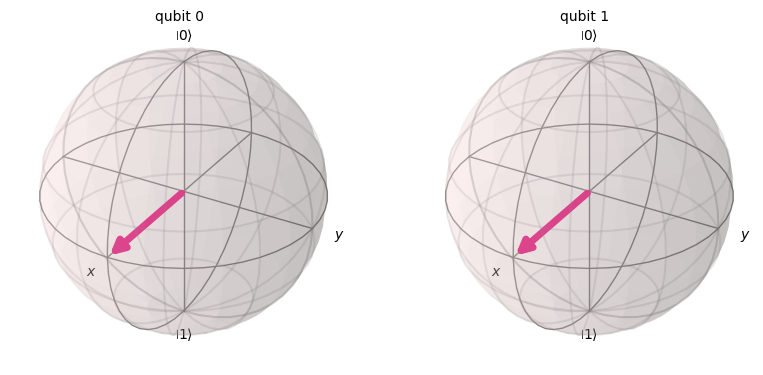

01 1
fourier basis


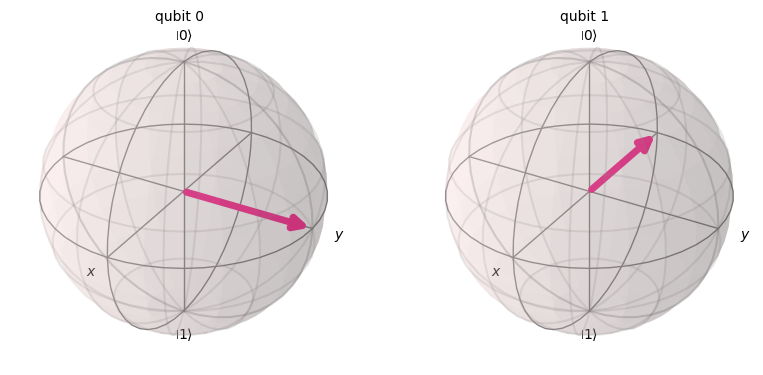

10 2
fourier basis


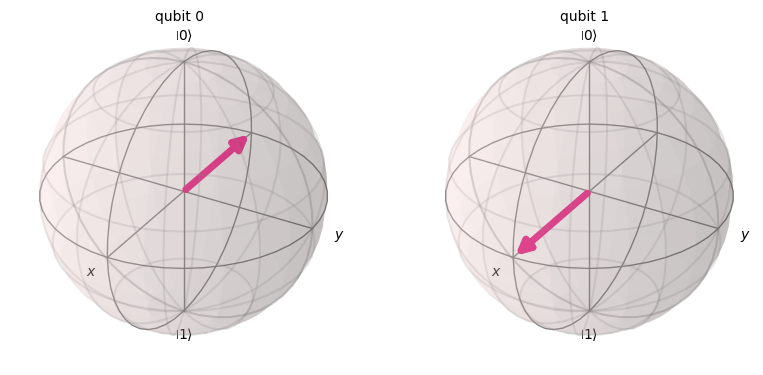

11 3
fourier basis


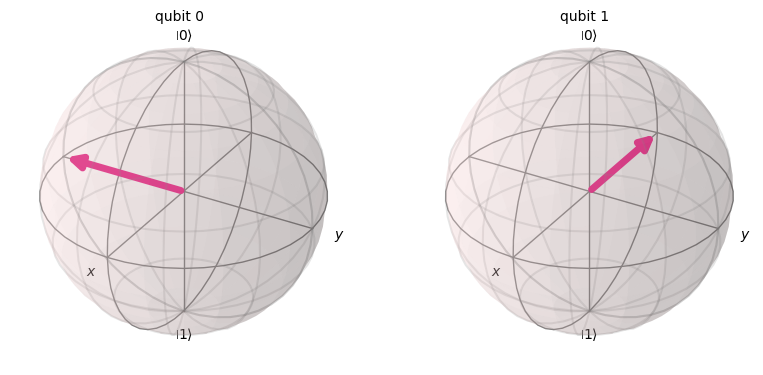

00 4
fourier basis


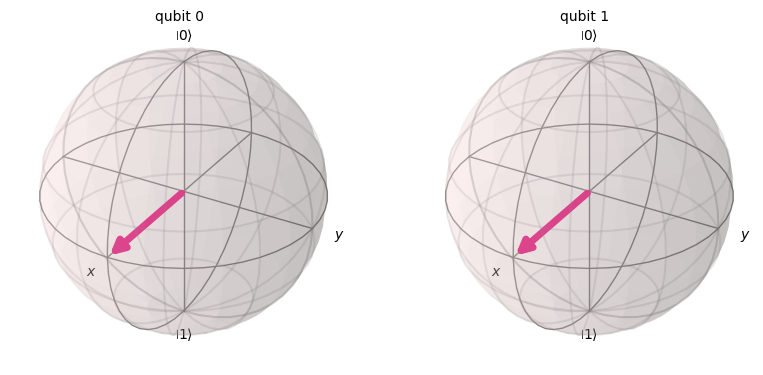

In [5]:
n_q=2
states=[format(x,f'0{n_q}b') for x in range(2**n_q)]
states.append(states[0])
for ii, state in enumerate(states):
    mycircuit=QuantumCircuit(len(state))
    mycircuit.initialize(Statevector.from_label(state).data,mycircuit.qubits[::-1])
    print(state, ii)
    # print('computational basis')
    # display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
    print('fourier basis')
    mycircuit.append(myQFT(len(state)),mycircuit.qubits)
    display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

0000 0
fourier basis


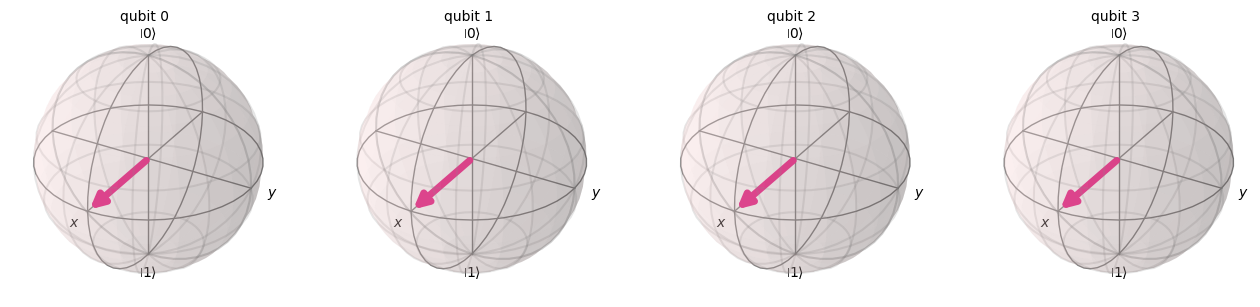

0001 1
fourier basis


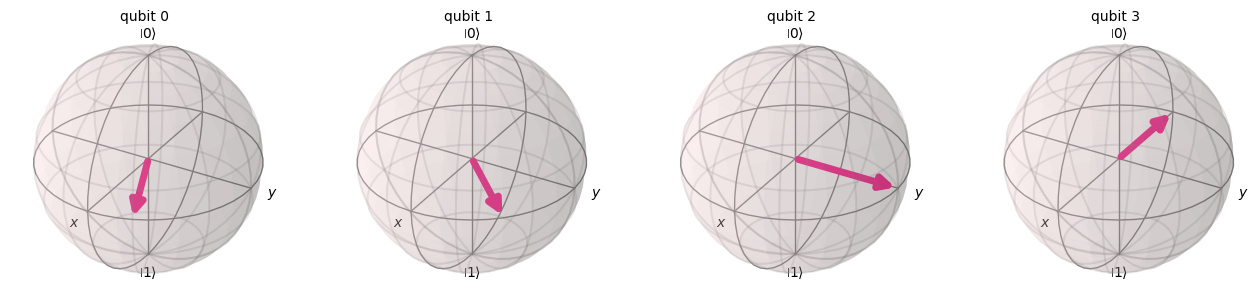

0010 2
fourier basis


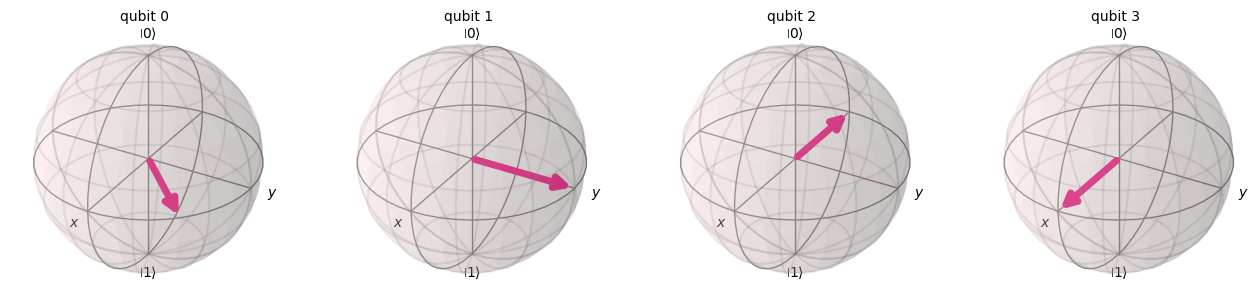

0011 3
fourier basis


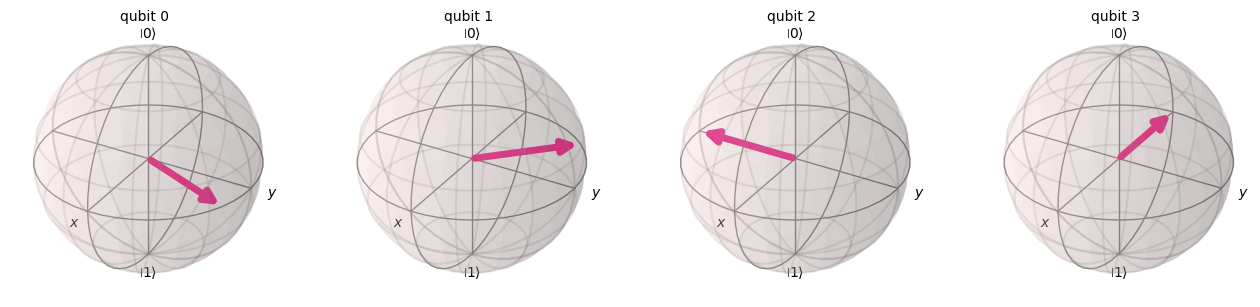

0100 4
fourier basis


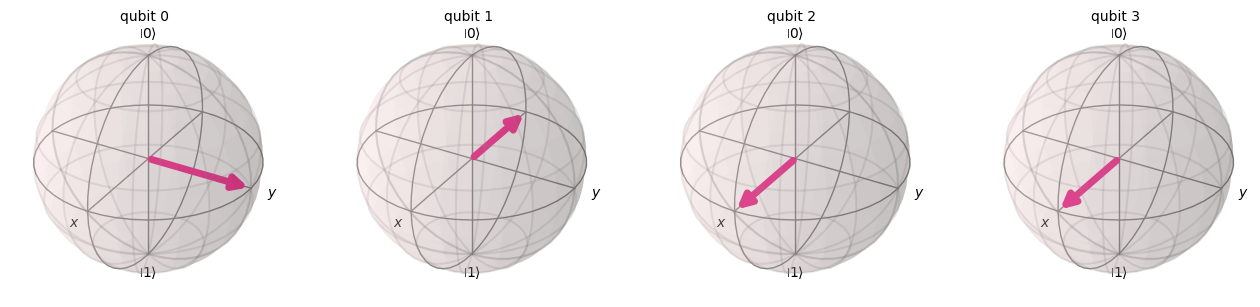

0101 5
fourier basis


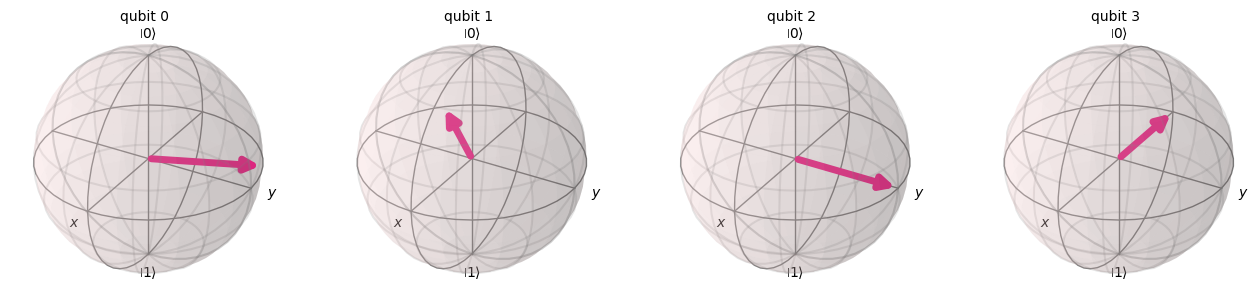

0110 6
fourier basis


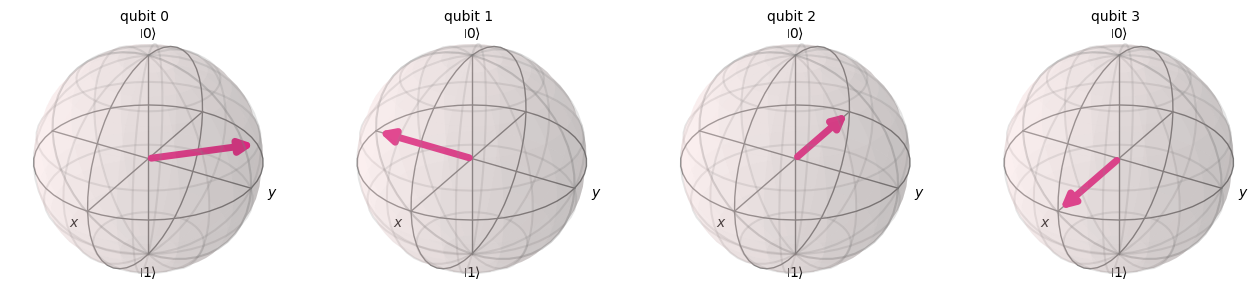

0111 7
fourier basis


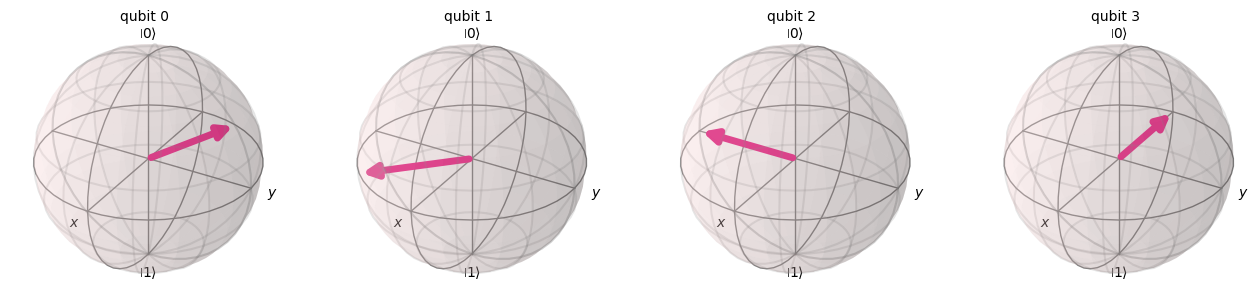

1000 8
fourier basis


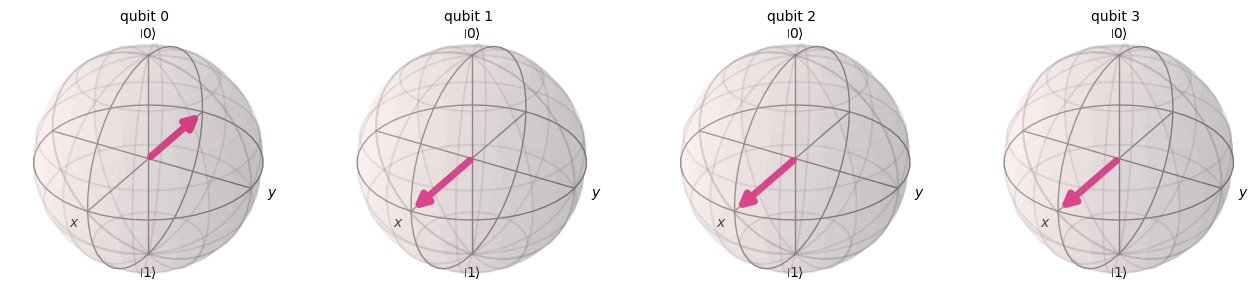

1001 9
fourier basis


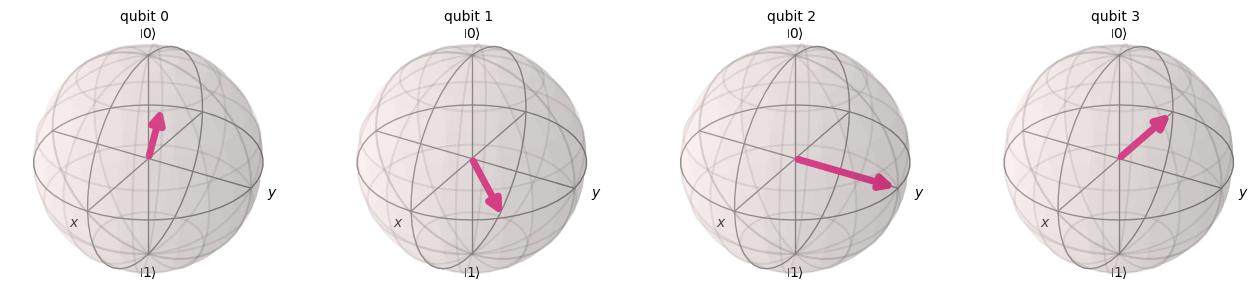

1010 10
fourier basis


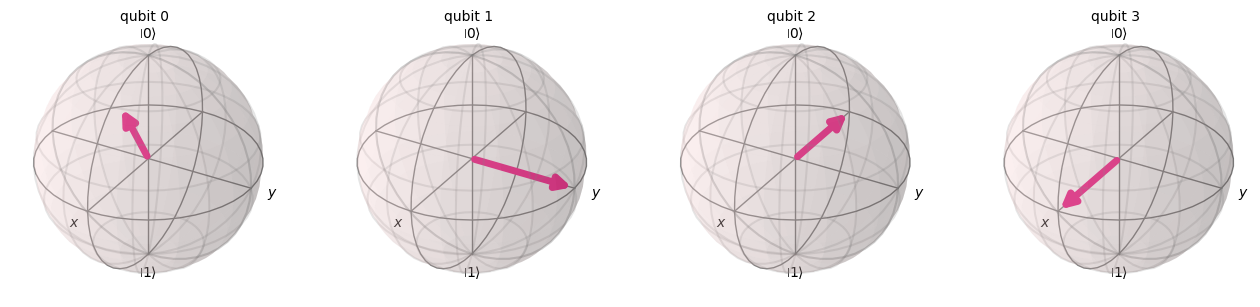

1011 11
fourier basis


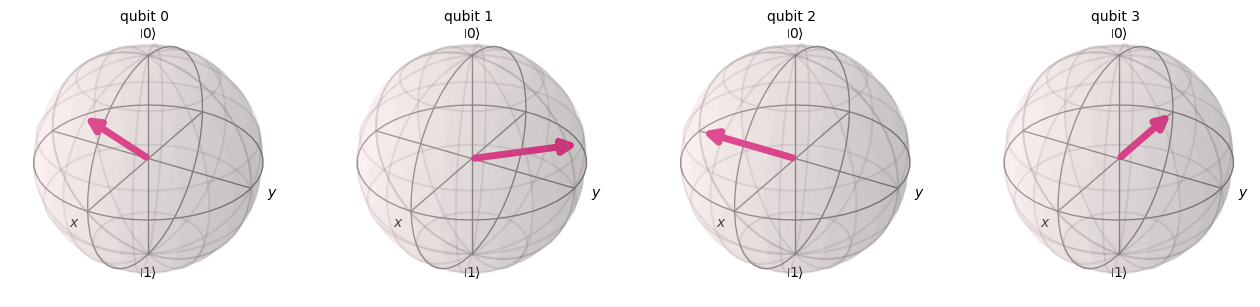

1100 12
fourier basis


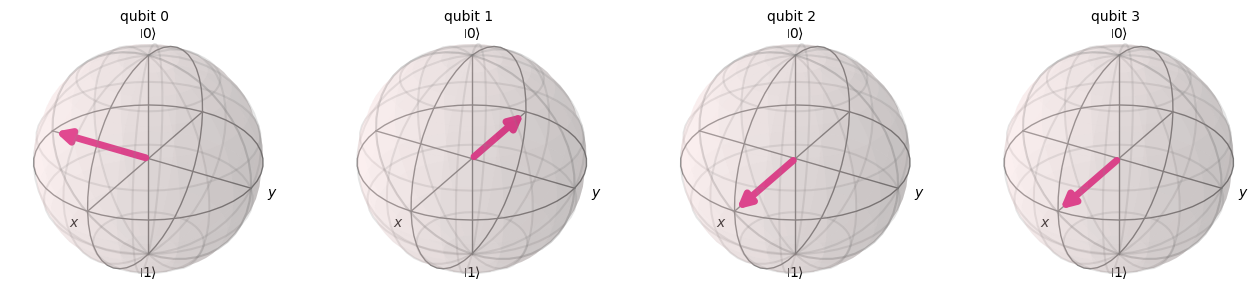

1101 13
fourier basis


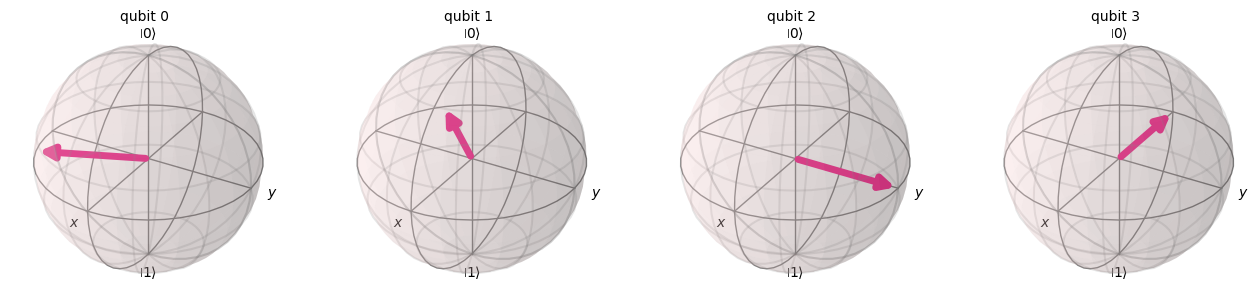

1110 14
fourier basis


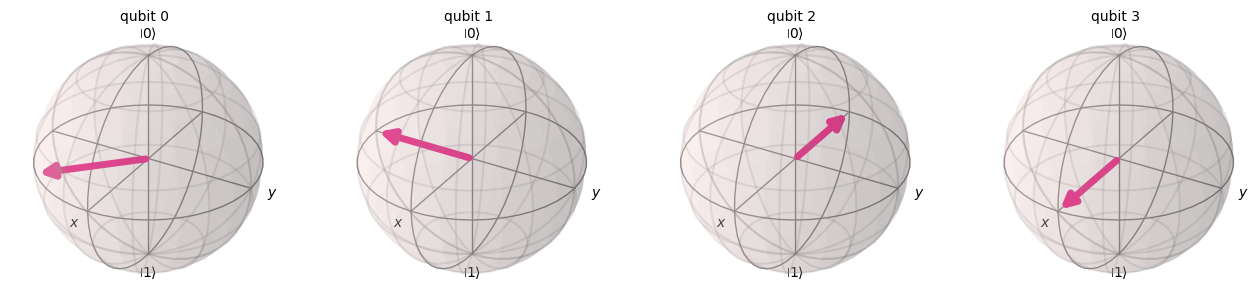

1111 15
fourier basis


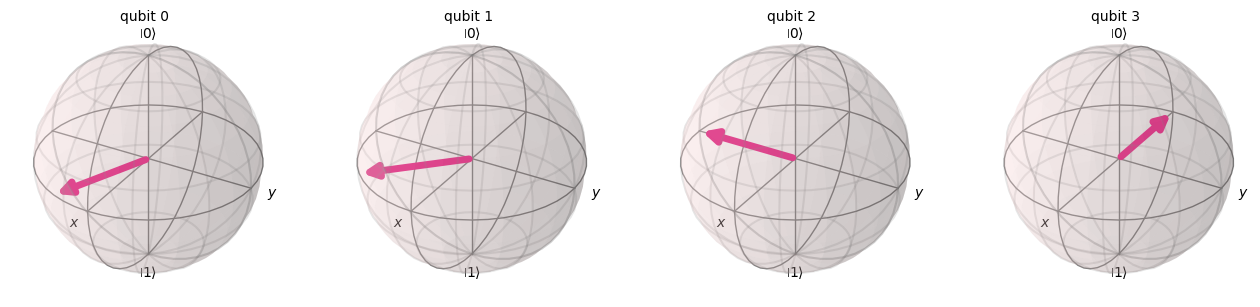

0000 16
fourier basis


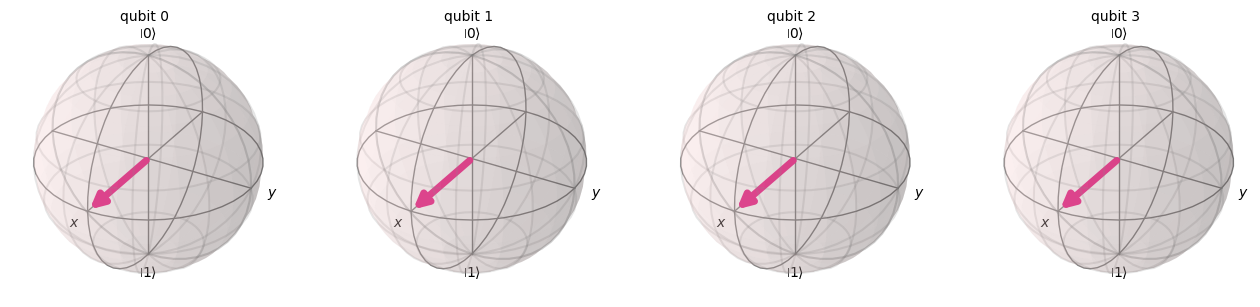

In [6]:
n_q=4
states=[format(x,f'0{n_q}b') for x in range(2**n_q)]
states.append(states[0])
for ii, state in enumerate(states):
    mycircuit=QuantumCircuit(len(state))
    mycircuit.initialize(Statevector.from_label(state).data,mycircuit.qubits[::-1])
    print(state, ii)
    # print('computational basis')
    # display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
    print('fourier basis')
    mycircuit.append(myQFT(len(state)),mycircuit.qubits)
    display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

Hamiltonian Matrix:
[[ 1.   0.5]
 [ 0.5 -1. ]]

Eigenvalues:
[-1.11803399  1.11803399]

Quantum Circuit:
     ┌───────┐┌─┐
  q: ┤ Rz(π) ├┤M├
     └───────┘└╥┘
c: 1/══════════╩═
               0 

Measurement counts:
{'0': 1024}


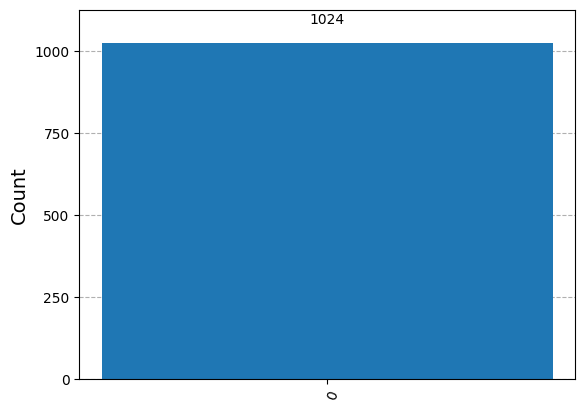

In [7]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

names = ["apple", "banana", "cherry", "date", "fig", "grape", "kiwi", "lemon", 
         "mango", "melon", "orange", "pear", "peach", "plum", "berry", "melon"]
name_to_bin = {name: format(i, '04b') for i, name in enumerate(names)}
target_name = "kiwi"
target_bin = name_to_bin[target_name]


def name_oracle(n, target_bin):
    qc = QuantumCircuit(n)
    for qubit in range(n):
        if target_bin[qubit] == '0':
            qc.x(qubit)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for qubit in range(n):
        if target_bin[qubit] == '0':
            qc.x(qubit)
    return qc.to_gate(label="Oracle")

import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from scipy.linalg import eigh

# Define the Hamiltonian as a matrix
hamiltonian = np.array([[1, 0.5], [0.5, -1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(hamiltonian)

# Print the Hamiltonian matrix and its eigenvalues
print("Hamiltonian Matrix:")
print(hamiltonian)
print("\nEigenvalues:")
print(eigenvalues)

# Construct a quantum circuit
qc = QuantumCircuit(1, 1)  # One qubit and one classical bit for measurement

# Apply gates based on Hamiltonian (for simple cases like 2x2 Hamiltonians)
# For illustration purposes, we'll use an RZ gate as a placeholder
qc.rz(2 * np.pi * 0.5, 0)  # Rotate Z by an angle related to matrix elements

# Add measurement
qc.measure(0, 0)

# Print the quantum circuit
print("\nQuantum Circuit:")
print(qc.draw())

# Transpile the circuit for a specific backend (use 'qasm_simulator' as the target)
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, backend)

# Convert the transpiled circuit to a format suitable for simulation
qobj = assemble(transpiled_circuit, shots=1024)

# Simulate the transpiled circuit
result = backend.run(qobj).result()
counts = result.get_counts()

# Print the measurement counts
print("\nMeasurement counts:")
print(counts)

# Optional: Plot the counts as a histogram
plot_histogram(counts)